# Predicting Origin Totals

### Objective: To build a model that predicts total refugees originating from particular country

We will be trying to fit boosting models (GB), bagging (RF) and some linear models with regularization

In [9]:
import pandas as pd

dataset = pd.read_csv('/Users/joel/Documents/Brainstation/Tablaeu/CLEANDATA/clean_merged_all.csv').drop('Unnamed: 0', axis=1)
refugees = pd.read_csv('/Users/joel/Documents/Brainstation/Tablaeu/immigrantbyorigin.csv')


In [10]:
### Getting titles for each heading:

fields = []

for i,j in enumerate(dataset.columns):
    if i>=1 and i<=40:
        fields.append(j)
        
titles = {}

for field in fields:
            path = '/Users/joel/Documents/Brainstation/Tablaeu/UNINFO/'+field+'.csv'
            file = pd.read_csv(path, encoding='ISO-8859-1')
            
            heading = field
            title = file.columns[-1]

            titles[heading] = title

In [11]:
### Adding the sum of all arrivals to dataset

sums = []

for index in dataset.index:
    sums.append(dataset.loc[index,'Alabama':].sum(0))
    
dataset['sum_destination'] = sums

In [951]:
import numpy as np
import matplotlib.pyplot as plt

### We'll be validating on 2015 data. So first split the set by year = 2015

df_fifteen = dataset.loc[dataset['year'] == 2015]
df_else = dataset.loc[dataset['year'] != 2015]

### Now split these sets into dependent and independent variables

X_test = df_fifteen.loc[:,'Demography4':'Work8']
X_train = df_else.loc[:,'Demography4':'Work8']
y_test = df_fifteen.loc[:,'sum_destination']
y_train = df_else.loc[:,'sum_destination']

dataset

,Country,Demography4,Demography5,Demography6,Demography7,Demography8,Education2,Education3,Education9,Environment3,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,sum_destination
0,Afghanistan,14.6,0.7,28.8,5.0,25.1,9.8,0.382,3.3,2.1,...,1.0,4.0,33.0,10.0,0.0,26.0,18.0,0.0,1.0,392.0
1,Albania,2.0,0.3,2.9,0.2,53.2,14.2,0.702,9.3,28.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,24.6,2.1,36.7,4.1,68.2,14.4,0.643,7.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Angola,10.9,0.5,21.9,4.3,40.9,10.3,0.445,4.7,46.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,Antigua and Barbuda,0.1,0.0,0.1,0.0,25.7,13.8,0.693,9.3,22.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Argentina,26.6,4.4,41.7,3.6,91.1,17.2,0.807,9.8,10.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Armenia,2.1,0.3,3.0,0.2,63.4,12.7,0.730,11.3,11.6,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,12.0
7,Australia,15.2,3.1,22.5,1.5,88.9,20.1,0.932,13.0,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Austria,5.7,1.5,8.4,0.4,65.9,15.7,0.802,11.0,46.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Azerbaijan,6.6,0.5,9.2,0.7,53.6,11.8,0.697,11.1,12.5,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


# Fitting a RandomForest Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

estimators = [
    ('scale',StandardScaler()),
    ('model',RandomForestRegressor())
]

pipe = Pipeline(estimators)

params = {
    'model__n_estimators':[10,20,30,40,50,60,70,80,90,100,150,200]
}

grid = GridSearchCV(estimator= pipe, param_grid = params, cv = 5)
grid.fit(X_train, y_train)
    


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_sp...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [499]:
rf_score = grid.score(X_test, y_test)
rf_score

0.1997352176901461

In [77]:
grid.best_estimator_.steps

[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('model',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False))]

In [97]:
rf_score

0.1997352176901461

# ^ This indicates that we're doing marginally better than simply guessing the average across each target. Knowing that the distribution is skewed (with many points lying to the left of the peak) we can apply the Box Cox transformation or the Log transformation to see if we can do a little better

Text(0,0.5,'residual')

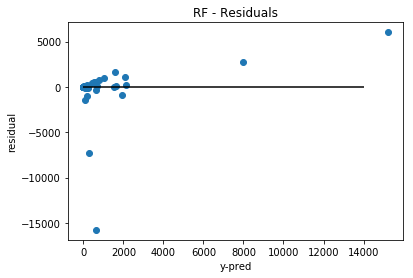

In [508]:
import matplotlib.pyplot as plt

plt.scatter(grid.predict(X_test), grid.predict(X_test) - y_test)
plt.hlines(0,0,14000)
plt.title('RF - Residuals')
plt.xlabel('y-pred')
plt.ylabel('residual')

# These residuals point out that we're doing really badly on those countries that do a lot of refugees. So let's try some transformations (1) Boxcox, and (2) Log

In [272]:
prediction = pd.DataFrame(grid.predict(X_test), index=X_test.index)
actual = pd.DataFrame(y_test, index = X_test.index)

abs_residuals = {}

for i in X_test.index:
    country = dataset.loc[i,'Country']
    residual = prediction.loc[i][0]-actual.loc[i][0]
    year = str(dataset.loc[i,'year'])
    abs_residual = abs(residual)
    abs_residuals[country]=abs_residual


In [516]:
sorted_vals = sorted(abs_residuals.values())
sorted_vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.033333333333333215,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.2,
 0.23333333333333334,
 0.23333333333333334,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.5,
 0.5666666666666667,
 0.6,
 0.6,
 0.6333333333333333,
 0.6333333333333333,
 0.7,
 0.7333333333333333,
 0.7666666666666667,
 0.8,
 0.8333333333333334,
 0.8666666666666667,
 0.9,
 0.9333333333333331,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,

In [302]:
sorted_keys = sorted(abs_residuals, key=abs_residuals.get)

In [952]:
sorted_keys

['Antigua and Barbuda',
 'Austria',
 'Bahamas',
 'Barbados',
 'Bosnia and Herzegovina',
 'Cabo Verde',
 'Costa Rica',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'France',
 'Greece',
 'Grenada',
 'Honduras',
 'Hungary',
 'Italy',
 'Japan',
 'Korea (Republic of)',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'New Zealand',
 'Peru',
 'Poland',
 'Portugal',
 'Saint Lucia',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'Spain',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'The former Yugoslav Republic of Macedonia',
 'Uruguay',
 'Zimbabwe',
 'Australia',
 'Cyprus',
 'Luxembourg',
 'Oman',
 'Suriname',
 'Belgium',
 'Finland',
 'Germany',
 'Panama',
 'Zambia',
 'Saint Vincent and the Grenadines',
 'Albania',
 'Malta',
 'Belize',
 'Chile',
 'Micronesia (Federated States of)',
 'Timor-Leste',
 'Argentina',
 'Brunei Darussalam',
 'Malaysia',
 'Ghana',
 'Venezuela (Bolivarian Republic of)',
 'Mongolia',
 'Nigeria',
 'Gabon',
 'Libya',
 'United Arab Emi

# From these lists, we can see that we're unpderperforming on the countries that produce the highest volumes

If we apply a BoxCOX transformation, what happens?

In [365]:
from scipy.special import boxcox1p

tries = [-2,-2.5,-2,-1.5,-1,-.5,0,.5,1.5,2]

y_train_box = boxcox1p(y_train,-0.1)
y_test_box = boxcox1p(y_test,-0.1)

In [370]:
box_scores = []
for i in tries:
    y_train_box = boxcox1p(y_train,i)
    y_test_box = boxcox1p(y_test,i)
    grid_box = GridSearchCV(estimator= pipe, param_grid = params, cv = 5)
    grid_box.fit(X_train, y_train_box)
    box_score = grid_box.score(X_test, y_test_box)
    box_scores.append([i,box_score])

In [375]:
box_scores

[[-2, 0.6894328250512343],
 [-2.5, 0.6655630017507387],
 [-2, 0.6924438453116315],
 [-1.5, 0.7093690229024692],
 [-1, 0.7332238234331536],
 [-0.5, 0.7888228082472962],
 [0, 0.646710321490567],
 [0.5, 0.5888247032117597],
 [1.5, -0.16829113207853563],
 [2, -0.3889582229662103]]

In [882]:
scores_withoutbox = []


alpha = .2
y_train_box_opt = boxcox1p(y_train,alpha)
y_test_box_opt = boxcox1p(y_test,alpha)
grid_box = GridSearchCV(estimator= pipe, param_grid = params, cv = 5)
grid_box.fit(X_train, y_train_box_opt)

from scipy.special import inv_boxcox1p

inv_y_pred = inv_boxcox1p(grid_box.predict(X_test),alpha)
residuals = y_test-inv_y_pred
mean_differences = y_test - y_test.mean()

n2 = residuals**2
d2 = mean_differences**2

e_n2 = n2.sum()
e_d2 = d2.sum()

scores_withoutbox.append([alpha, 1 - e_n2/e_d2])
scores_afterbox = []
scores_afterbox.append(grid_box.score(X_test, y_test.apply(lambda x: boxcox1p(x, alpha))))

In [949]:
print(scores_withoutbox, scores_afterbox)

[[0.2, 0.33129773509656935]] [0.8231814038117926]


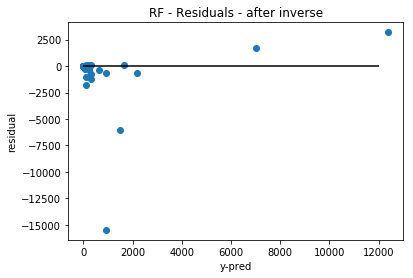

In [935]:
plt.scatter(inv_boxcox1p(grid_box.predict(X_test), alpha), inv_boxcox1p(grid_box.predict(X_test), alpha) - y_test)

plt.title('RF - Residuals - after inverse')
plt.xlabel('y-pred')
plt.ylabel('residual')
# plt.ylim(-15000,50)
plt.hlines(0,0,12000)

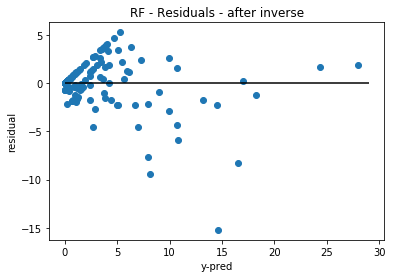

In [941]:
plt.scatter(grid_box.predict(X_test), grid_box.predict(X_test) - y_test.apply(lambda x: boxcox1p(x,alpha)))
plt.title('RF - Residuals - after inverse')
plt.xlabel('y-pred')
plt.ylabel('residual')
# plt.ylim(-15000,50)
plt.hlines(0,0,29)

# ^ Based on these scores, we're doing MUCH better than before. at alpha = 0.2, we're doing the best. What about a log transformation?

In [871]:
from math import log10, e, log1p

scores_log = []
scores_withoutinverse = []

y_train_log = y_train.apply(lambda x: log1p(x))
y_test_box_opt = y_test.apply(lambda x: log1p(x))

grid_box_log = GridSearchCV(estimator= pipe, param_grid = params, cv = 5)
grid_box_log.fit(X_train, y_train_log)

inv_y_pred = e**(grid_box_log.predict(X_test))
residuals = y_test-inv_y_pred
mean_differences = y_test - y_test.mean()

n2 = residuals**2
d2 = mean_differences**2

e_n2 = n2.sum()
e_d2 = d2.sum()

scores_log.append([alpha, 1 - e_n2/e_d2])
scores_withoutinverse.append(grid_box_log.score(X_test, y_test_box_opt))

In [877]:
[scores_log, scores_withoutinverse]

[[[0.2, 0.2723557423613343]], [0.6735071913259731]]

Text(0,0.5,'residual')

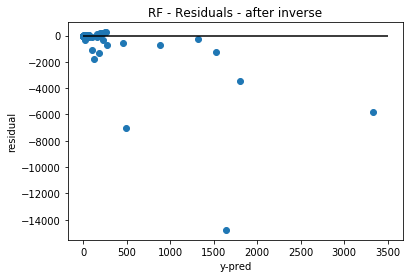

In [878]:
plt.scatter(e**(grid_box_log.predict(X_test)), e**(grid_box_log.predict(X_test)) - y_test)
plt.hlines(0,0,3500)
plt.title('RF - Residuals - after inverse')
plt.xlabel('y-pred')
plt.ylabel('residual')

Text(0,0.5,'residual')

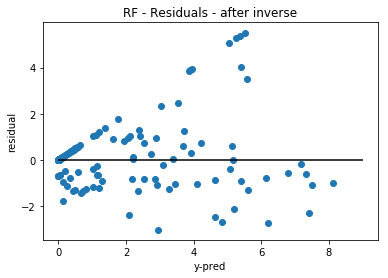

In [879]:
plt.scatter((grid_box_log.predict(X_test)), (grid_box_log.predict(X_test)) - y_test.apply(lambda x: log1p(x)))
plt.hlines(0,0,9)
plt.title('RF - Residuals w. Log Transform')
plt.xlabel('y-pred')
plt.ylabel('residual')

In [950]:
grid_box_log.best_estimator_.steps

[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('model',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False))]

# A log transformation does well too!

   # Fitting a linear model with regularization

In [58]:
from sklearn.linear_model import Ridge, Lasso

lm_estimators = [
    ('scale',StandardScaler()),
    ('model',Ridge())
]

lm_pipe = Pipeline(lm_estimators)

lm_params = {
    'model':[Ridge(), Lasso()],
    'model__alpha':[.1,.2,.3,.4,.5]
}

lm_grid = GridSearchCV(estimator=lm_pipe, param_grid=lm_params, cv=5)

In [59]:
lm_grid.fit(X_train,y_train)

/Users/joel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model': [Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)], 'model__alpha': [0.1, 0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [83]:
lm_score = lm_grid.score(X_test, y_test)

In [84]:
lm_score

0.1061008358359885

## Fitting GRADIENT BOOST

In [93]:
from sklearn.multioutput import MultiOutputRegressor

gb_estimators = [
    ('scale',StandardScaler()),
    ('model',GradientBoostingRegressor())
]

gb_pipe = Pipeline(gb_estimators)

gb_params = {'model__n_estimators':[100,150,200],
'model__learning_rate':[0.1,0.3,0.5],
'model__max_depth':[3,5,7]}

gb_grid = GridSearchCV(estimator=gb_pipe, param_grid=gb_params, cv=5)

In [705]:
gb_grid.fit(X_train, y_train.apply(lambda x: log1p(x)))

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
    ...s=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model__n_estimators': [100, 150, 200], 'model__learning_rate': [0.1, 0.3, 0.5], 'model__max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [802]:

gb_score_log = gb_grid.score(X_test, y_test.apply(lambda x: log1p(x)))
gb_score_log

inv_y_pred = e**(gb_grid.predict(X_test))
residuals = y_test-inv_y_pred
mean_differences = y_test - y_test.mean()

n2 = residuals**2
d2 = mean_differences**2

e_n2 = n2.sum()
e_d2 = d2.sum()

gb_score_inverse = 1-e_n2/e_d2

print(gb_score_log, gb_score_inverse)

0.7984159970178614 0.20812808200505806


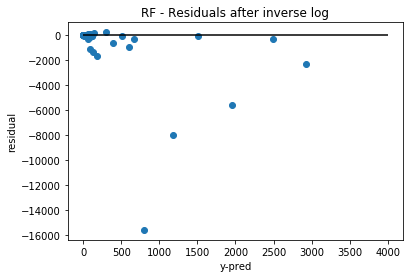

In [828]:
plt.scatter(e**(gb_grid.predict(X_test)), e**(gb_grid.predict(X_test)) - y_test)
plt.hlines(0,0,4000)
plt.title('RF - Residuals after inverse log')
plt.xlabel('y-pred')
plt.ylabel('residual')
plt.autoscale()

(0, 9)

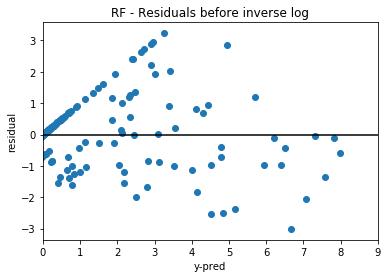

In [812]:
plt.scatter((gb_grid.predict(X_test)), (gb_grid.predict(X_test)) - y_test.apply(lambda x: log1p(x)))
plt.hlines(0,0,4000)
plt.title('RF - Residuals before inverse log')
plt.xlabel('y-pred')
plt.ylabel('residual')
plt.xlim(0,9)

In [953]:
for i in [rf_score, lm_score, gb_score]:
    print(i)

0.1997352176901461
0.1061008358359885
0.05105396120774042


# To summarize, these are the R2s for each of our models before any transformations.